![Astrofisica Computacional](../logo.PNG)

---
## 01. Método de Volumenes Finitos. La Ecuación de Continuidad 

Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### Resumen

Se presenta el método de Volumenes Finitos para resolver la ecuación de continuidad. 


---

---
## Conservación de la Masa

Como es bien conocido, la ecuación de continuidad 

\begin{equation}
\frac{\partial \rho}{\partial t} + \nabla \cdot (\rho \vec{v}) = 0,
\end{equation}

implica la conservación de la masa. Para mostrar este resultado explícitamente, se integrará a ambos lados de la ecuación sobre el volumen espacial que se esté considerando,

\begin{align}
\int_V \frac{\partial \rho}{\partial t} d^3 x = & - \int_V  \vec{\nabla} \cdot (\rho \vec{v}) d^3 x \\
\frac{\partial }{\partial t} \int_V \rho d^3 x = & - \int_V  \vec{\nabla} \cdot (\rho \vec{v}) d^3 x.
\end{align}

Nótese que en el lado izquierdo de esta ecuación se puede identificar la variación temporal de la masa total contenida en el volumen $V$. Utilizando el teorema de la divergencia en el lado izquierdo se obtiene la **forma conservativa** (o forma integral) de la ecuación de continuidad,

\begin{align}
\frac{\partial }{\partial t} \int_V \rho d^3 x = & - \oint_S  \rho \vec{v} \cdot d\vec{\Sigma} 
\end{align}

donde $S$ es la superficie que encierra el volumen $V$, $d\vec{\Sigma}$ es el vector normal a la superficie y el término de la derecha corresponde al flujo que atraviesa $S$. En caso de que no exista un flujo neto, se obtiene la conservación de la masa,

\begin{equation}
\frac{\partial M}{\partial t} = 0.
\end{equation}

Pôr otra parte, la ecuación de movimiento

\begin{equation}
\rho \left( \frac{\partial \vec{v}}{\partial t} +  \vec{v} \cdot \vec{\nabla} \vec{v}\right) = - \vec{\nabla} P 
\end{equation}

se puede re-escribir como

\begin{align}
\rho \frac{\partial \vec{v}}{\partial t} + \rho \vec{v} \cdot \vec{\nabla} \vec{v} =& - \vec{\nabla} P \\
 \frac{\partial (\rho \vec{v})}{\partial t} - \vec{v} \frac{\partial \rho}{\partial t} + \rho \vec{v} \cdot \vec{\nabla} \vec{v} =& - \vec{\nabla} P \\
 \frac{\partial (\rho \vec{v})}{\partial t} + \vec{v} \nabla \cdot (\rho \vec{v}) + \rho \vec{v} \cdot \vec{\nabla} \vec{v} =& - \vec{\nabla} P\\
 \frac{\partial (\rho \vec{v})}{\partial t} +  \nabla \cdot (\rho \vec{v} \vec{v})  =& - \vec{\nabla} P\\
 \frac{\partial (\rho \vec{v})}{\partial t} = &-  \nabla \cdot \left( \rho \vec{v} \vec{v} + P \overset{\text{$\leftrightarrow$}}{I}  \right)  ,
\end{align}

donde se ha utilizado la notación de diadas ($\overset{\text{$\leftrightarrow$}}{I}$ es la diada identidad). Siguiendo el mismo procedimiento que se utilizó para la ecuación de continuidad, se obtiene la forma conservativa de la ecuación de movimiento,

\begin{align}
\int_V \frac{\partial (\rho \vec{v})}{\partial t} d^3 x = & - \int_V  \nabla \cdot \left( \rho \vec{v} \vec{v} + P \overset{\text{$\leftrightarrow$}}{I}  \right) d^3 x \\
\frac{\partial }{\partial t} \int_V \rho \vec{v} d^3 x = & - \int_V  \nabla \cdot \left( \rho \vec{v} \vec{v} + P \overset{\text{$\leftrightarrow$}}{I}  \right) d^3 x\\
\frac{\partial }{\partial t} \int_V \rho \vec{v} d^3 x = & - \oint_S  \left( \rho \vec{v} \vec{v} + P \overset{\text{$\leftrightarrow$}}{I}  \right) \cdot d\vec{\Sigma}.
\end{align}


Finalmente, la forma conservativa de la ecuación de energías resulta ser

\begin{equation}
\frac{\partial }{\partial t} \int_V \rho e d^3 x =  - \oint_S  \left( \rho e + P \right) \vec{v} \cdot d\vec{\Sigma}
\end{equation}

##  Discretización de una Función Suave.

Considere una función suave $f(x)$ definida en un intervalo finito $[a,b]$. Para representar numéricamente esta función, es necesario dividir el intervalo en una malla con $N-1$ intervalos igualmente espaciados o, equivalentemente, utilizando $N$ nodos. Este proceso se denomina *discretizar* la función. 

Existen diferentes métodos de discretización, dentro de los cuales se tienen los que involucran *mallas estructuradas*, en los cuales se utilizan coordenadas cartesianas para dividir el dominio en forma rectangular. Estos incluyen los métodos de

- Diferencias finitas
- Volumenes finitos
- Elementos finitos

También existen métodos basados en *mallas no-estructuradas* en donde se utilizan celdas triangulares o tetraedros para la discretización. Estos métodos son muy utiles cuando el dominio tiene formas irregulares, pero el tratamiento es  mas complejo.


<center>
<img src="https://i.ibb.co/PgDD2qK/Discretization.png" alt="drawing" width="600"/>
</center>


### Método de Diferencias Finitas 

Hasta este momento, siempre hemos utilizado el método de diferencias finitas, en el que se introduce una malla estructurada cartesiana. De esta forma, el dominio se divide en $N-1$ intervalos igualmente espaciado con $N$ nodos. La información discreta se obtiene al evaluar la función en puntos específicos, los cuales pueden ser los nodos o los puntos medios de cada intervalo, como se ilustra en la figura. 



---

### Método de Volumenes Finitos

En este método de discretización, el dominio también se divide en intervalos igualmente espaciados pero el valor de la función se obtiene al tomar su promedio en cada intervalo. Por ejemplo, en el intervalo $i$, cuyos puntos extremos son $x_{i-\frac{1}{2}}$ y $x_{i+\frac{1}{2}}$, el valor de la función será

\begin{equation}
\langle f_i \rangle = \frac{1}{\Delta x} \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}} f(x) dx
\end{equation}

En la figura, el valor promedio de la función esta representado por la linea horizontal dentro de cada interevalo. 

Utilizando una expansión en serie de Taylor, se tiene

\begin{equation}
f(x) = f(x_i) + f'(x_i) (x-x_i) + \frac{1}{2} f''(x_i) (x - x_i)^2 + ...
\end{equation}

y por lo tanto, a segundo orden en $\Delta x$, 

\begin{equation}
\langle f_i \rangle \sim f(x_i) + \mathcal{O} (\Delta x ^2).
\end{equation}

Esta ecuación muestra que el promedio en cada una de las zonas se puede aproximar como el valor de la función en el punto medio del intervalo.

---
###  Aplicación del Método de Volumenes Finitos a la Ecuación de Conservación 

El método de volumenes finitos es muy útil al aplicarse a ecuaciones relacionadas con leyes de conservación. Por ejemplo, considere la ecuación de continuidad

\begin{equation}
\frac{\partial \psi}{\partial t} + \nabla \cdot F(\psi) = 0,
\end{equation}

donde $\psi(t,x,y,z)$ es el *vector* de cantidades conservadas y $F(\psi)$ representa el flujo de estas cantidades.

En el caso unidimensional, donde $\psi = \psi(t,x)$, esta ecuación se reduce a

\begin{equation}
\frac{\partial \psi}{\partial t} = - \frac{\partial F(\psi)}{\partial x} .
\end{equation}


Al introducir una malla de discretización e integrar la ecuación diferencial en uno de los itervalos definidos y normalizar por  $\Delta x$ se obtiene

\begin{align}
\frac{1}{\Delta x} \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}} \frac{\partial \psi}{\partial t} dx = &- \frac{1}{\Delta x} \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}}  \frac{\partial F(\psi)}{\partial x} dx \\
\frac{\partial }{\partial t} \left[ \frac{1}{\Delta x} \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}} \psi dx \right] = &- \frac{1}{\Delta x} \left[ \left. F(\psi)\right|_{x_{i+\frac{1}{2}}} - \left. F(\psi)\right|_{x_{i-\frac{1}{2}}} \right] \\
\frac{\partial \langle \psi_i \rangle }{\partial t} = &- \frac{1}{\Delta x} \left[ \left. F(\psi)\right|_{x_{i+\frac{1}{2}}} - \left. F(\psi)\right|_{x_{i-\frac{1}{2}}} \right]
\end{align}

Con el fin de ilustrar uno de los aspectos más interesantes del método de volumenes finitos, considere el mismo procedimiento que se realizó pero ahora en el siguiente intervalo de la malla,

\begin{align}
\frac{\partial \langle \psi_{i+1} \rangle }{\partial t} = &- \frac{1}{\Delta x} \left[ \left. F(\psi)\right|_{x_{i+\frac{3}{2}}} - \left. F(\psi)\right|_{x_{i+\frac{1}{2}}} \right]
\end{align}

Nótese que el flujo a través de la superficie $x_{i+\frac{1}{2}}$ aparece tanto en la expresión para el intervalo $i$ como en la expresión para el intervalo $i+1$. Cuando la ecuación diferencial se resuelve en el intervalo completo $[a,b]$, estos flujos compartidos a través de las superficies compartidas aparecerán sumandose en un intervalo y restandose en el otro.  Por esta razón, la cantidad $\psi$ se conservará exactamente a lo largo del proceso (hasta la precisión dada por el error de redondeo).

---
## La Ecuación de Advección y su relación con la Ecuación de Continuidad.

Nótese que la ecuación de advección con velocidad constante $v$, 

\begin{equation}
\partial_t \psi + v \partial_x \psi = 0\,\,,
\end{equation}

se puede re-escribir como una ecuación de continuidad,

\begin{equation}
\partial_t \psi + \partial_x F(\psi) = 0\,\,,
\end{equation}

al definir el flujo como $F(\psi)= v\psi$. Considerando el método de volumenes finitos descrito arriba, se tendrá la relación

\begin{align}
\frac{\partial \langle \psi_i \rangle }{\partial t} = &- \frac{1}{\Delta x} \left[ F(\psi)_{i+\frac{1}{2}} -  F(\psi)_{i-\frac{1}{2}} \right].
\end{align}

Ahora bien, la derivada temporal en el lado derecho se evaluara en el instante $n+\frac{1}{2}$ y utilizará una diferencia centrada (estimado de segundo orden) el cual involucrará los instantes $n$ y $n+1$. Por esta razón, las funciones del lado derecho estarán evaluadas en el instante $n+\frac{1}{2}$. 

\begin{align}
\frac{\psi_i^{n+1} - \psi_i ^n }{\Delta t} = &- \frac{1}{\Delta x} \left[ F(\psi)_{i+\frac{1}{2}}^{n+\frac{1}{2}} -  F(\psi)_{i-\frac{1}{2}}^{n+\frac{1}{2}} \right].
\end{align}

De aqui se despeja 

\begin{align}
\psi_i^{n+1} = & \psi_i ^n - \frac{\Delta t}{\Delta x} \left[ F(\psi)_{i+\frac{1}{2}}^{n+\frac{1}{2}} -  F(\psi)_{i-\frac{1}{2}}^{n+\frac{1}{2}} \right].
\end{align}


Ya que la función de flujo depende exclusivamente de $\psi$, la evaluación de $F$ en el instante mediio $n+\frac{1}{2}$ se obtiene al evaluar la función de estado $\psi$ en este instante, i.e.

\begin{equation}
F(\psi)_{i+\frac{1}{2}}^{n+\frac{1}{2}} = F \left(\psi_{i+\frac{1}{2}}^{n+\frac{1}{2}} \right),
\end{equation}

y por lo tanto

\begin{align}
\psi_i^{n+1} = & \psi_i ^n - \frac{\Delta t}{\Delta x} \left[ F\left(\psi_{i+\frac{1}{2}}^{n+\frac{1}{2}}\right) -  F\left(\psi_{i-\frac{1}{2}}^{n+\frac{1}{2}}\right) \right] .
\end{align}

Ahora bien, para poder obtener estas evaluaciones, se aproximará la función de estado a segundo orden en una serie de Taylor. Sin embargo, en cada una de las interfaces la expansión puede calcularse desde la derecha o desde la izquierda. Por ejemplo, la expansión desde la izquierda da como resultado

\begin{align}
\psi_{i+\frac{1}{2} , L}^{n+\frac{1}{2}} = & \psi_i^n + \frac{\Delta x}{2} \left. \frac{\partial \psi}{\partial x} \right|_i + \frac{\Delta t}{2} \left. \frac{\partial \psi}{\partial t} \right|_i + ...\\
\psi_{i+\frac{1}{2} , L}^{n+\frac{1}{2}} = & \psi_i^n + \frac{\Delta x}{2} \left. \frac{\partial \psi}{\partial x} \right|_i + \frac{\Delta t}{2} \left( -v\left. \frac{\partial \psi}{\partial x} \right|_i \right) + ... \\
\psi_{i+\frac{1}{2} , L}^{n+\frac{1}{2}} = & \psi_i^n + \frac{\Delta x}{2} \left( 1 - v \frac{\Delta t}{\Delta x}\right) \left. \frac{\partial \psi}{\partial x} \right|_i  + ... 
\end{align}

Mientras que la aproximación desde la derecha será

\begin{align}
\psi_{i+\frac{1}{2} , R}^{n+\frac{1}{2}} = & \psi_{i+1}^n - \frac{\Delta x}{2} \left( 1 + v \frac{\Delta t}{\Delta x}\right) \left. \frac{\partial \psi}{\partial x} \right|_{i+1}  + ... 
\end{align}

La primera derivada en la primera de estas expresiones puede ser evaluada en la forma

\begin{equation}
\left. \frac{\partial \psi}{\partial x} \right|_i = \frac{\psi_{i+1} - \psi_{i-1}}{2\Delta x} 
\end{equation}

mientas que la derivada en la segunda expresión será

\begin{equation}
\left. \frac{\partial \psi}{\partial x} \right|_{i+1} = \frac{\psi_{i+2} - \psi_{i}}{2\Delta x} .
\end{equation}

### El Problema de Riemann 

Las dos expansiones encontradas arriba dan un estimado del valor de la función de estado desde la derecha o desde la izquierda de la interfaz en la que se evalua. Escoger la expresión adecuada para reemplazar en la ecuación diferencial se conoce como el **problema de Riemann**. Matemáticamente, este probelma se escribe en la forma


\begin{equation}
\psi_{i+\frac{1}{2}}^{n+\frac{1}{2}} = \mathcal{R} \left( \psi_{i+\frac{1}{2} , L}^{n+\frac{1}{2}} , \psi_{i+\frac{1}{2} , R}^{n+\frac{1}{2}}  \right).
\end{equation}

En el caso específico del problema de advección,  en el que la ecuación diferencial propaga la función de estado hacia la derecha (si $v>0$) o hacia la izquierda (si $v<0$), la solución del problema de Riemann es sencialla:

\begin{equation}
\mathcal{R} \left( \psi_{i+\frac{1}{2} , L}^{n+\frac{1}{2}} , \psi_{i+\frac{1}{2} , R}^{n+\frac{1}{2}}  \right) = 
\begin{cases}
\psi_{i+\frac{1}{2} , L}^{n+\frac{1}{2}}  \hspace{0.5cm} \text{ si } v>0 \text{ (upwind)} \\
\psi_{i+\frac{1}{2} , R}^{n+\frac{1}{2}}  \hspace{0.5cm} \text{ si } v<0 \text{ (downwind)}\\
\end{cases}
\end{equation}

### Condiciones de Frontera 

Las condiciones de frontera que se implementan en los extremos del dominio de integración pueden ser

- Condición periodica:

\begin{align}
\psi_{N} = & \psi_{0}\\
\psi_{0} = & \psi_{N} .
\end{align}

- Condición de Outflow  (gradiente nulo):

\begin{align}
\psi_{N} = & \psi_{N-1}\\
\psi_{0} = & \psi_{1} .
\end{align}

---
### Algoritmo para resolver la Ecuación de Advección utilizando el Método de Volumenes Finitos 

El algoritmo para resolver la ecuación de advección incluye los siguientes pasos:

1. Implementar condiciones iniciales 
2. Obtener el tamaño de paso temporal $\Delta t$ a partir de $v$, $\Delta x$ y el coeficiente $C_{CFL}$ 
3. Loop principal: 
 * Imponer condiciones de frontera
 * Calcular los estados en las interfaces de los intervalos (izquierda y derecha)
 * Solucionar el problema de Riemann en todas las interfaces 
 * Realizar la actualización de la ecuación para obtener $a^{n+1}$
 

┌ Info: Saved animation to 
│   fn = /Users/eduard/Documents/Clases/CA/EjerciciosAC2022/16. PDE II. Finite Volmues/advectionFV1.gif
└ @ Plots /Users/eduard/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/eduard/Documents/Clases/CA/EjerciciosAC2022/16. PDE II. Finite Volmues/advectionFV1.gif")
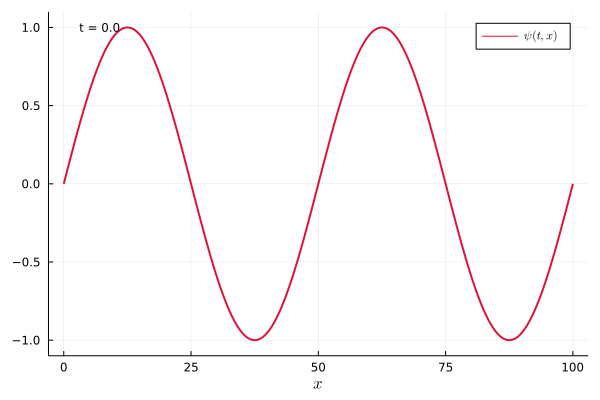

In [5]:
using Plots
using LaTeXStrings

function gaussian(x)
    x0 = 30.
    sigma = sqrt(15.)
    return exp(-(x-x0)^2/(2*sigma^2))
end

function TopHat(x)
    if x<50
        return 0.2
    else
        return 1.0
    end
end

function sinProfile(x; L=x_f)
    return sin(4*pi*x/L)
end


function derivative(f,dx)
    # First derivative dfdx in a domain range
    dfdx = zeros(length(f))
    # Lateral derivate at the boundaries
    dfdx[1] = (f[2] - f[1])/dx
    dfdx[end] = (f[end] - f[end-1])/dx
    # Central derivatives at inner points
    for i in 2:length(f)-1
        dfdx[i] = (f[i+1] - f[i-1])/(2*dx)
    end
    return dfdx
end

    
function flux(psi,v)
    v*psi
end
    

function Riemann(psi, v, dt, dx)
    # Solution of the Riemann problem
    dpsidx = derivative(psi,dx)
    psi_halftime = zeros(length(psi))
    if v>0
        for i in 1:length(psi)
            psi_halftime[i] = psi[i] + (dx/2.)*(1-(dt/dx)*v)*dpsidx[i]
        end
    else
        for i in length(psi)-1:-1:1
            psi_halftime[i] = psi[i] - (dx/2.)*(1-(dt/dx)*v)*dpsidx[i+1]
        end
    end
    return psi_halftime
end
    
    
# Finite-Volume Method
function fv(psi0, v, tgrid, xgrid)
    dt = tgrid[2] - tgrid[1]
    dx = xgrid[2] - xgrid[1]
    psi = zeros(length(tgrid),length(xgrid))
    psi[1,:] = psi0.(xgrid)
    
    for n in 1:length(tgrid)-1, j in 2:length(xgrid)-1
        R = Riemann(psi[n,:], v, dt, dx)
        F = flux.(R,v)
        psi[n+1,j] = psi[n,j] - (dt/dx)*(F[j] - F[j-1])
        # Outflow boundary conditions
        psi[n+1,1] = psi[n+1,2]
        psi[n+1,end] = psi[n+1,end-1]
    end    
    return psi
end   

                

# Velocity of the advection
v = 0.1

# CFL Coefficient
C = 0.2

# Definition of the grids
x_i = 0.
x_f = 100.
Nx = 500
xgrid = LinRange(x_i, x_f, Nx)
dx = xgrid[2] - xgrid[1]

t_i = 0.
t_f = 1000.
dt = C*dx/abs(v)
tgrid = t_i:dt:t_f




psi = fv(sinProfile, v, tgrid, xgrid)

anim = @animate for i in 1:50:length(tgrid)
    plot(xgrid, psi[i,:],label=L"\psi(t,x)", lw = 2, linecolor="crimson", ylims=(-1.1,1.1))
    xlabel!(L"x")
    annotate!(7,1, text("t = $(round(tgrid[i];digits=2))",8))
end

gif(anim, "advectionFV1.gif", fps = 15)


┌ Info: Saved animation to 
│   fn = /Users/eduard/Documents/Clases/CA/EjerciciosAC2022/16. PDE II. Finite Volmues/advectionFV2.gif
└ @ Plots /Users/eduard/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/eduard/Documents/Clases/CA/EjerciciosAC2022/16. PDE II. Finite Volmues/advectionFV2.gif")
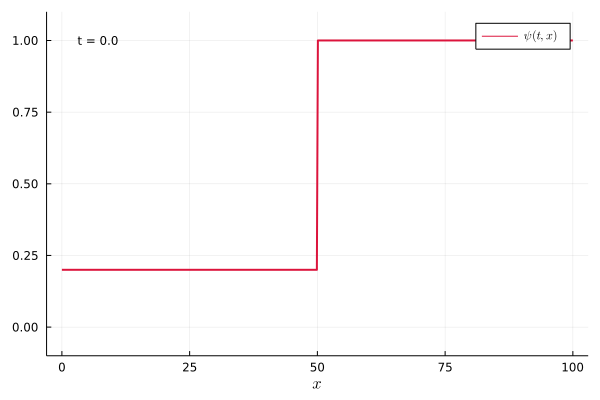

In [2]:
# Velocity of the advection
v = 0.1

# CFL Coefficient
C = 0.2

# Definition of the grids
x_i = 0.
x_f = 100.
Nx = 500
xgrid = LinRange(x_i, x_f, Nx)
dx = xgrid[2] - xgrid[1]

t_i = 0.
t_f = 1000.
dt = C*dx/abs(v)
tgrid = t_i:dt:t_f

psi = fv(TopHat, v, tgrid, xgrid)

anim = @animate for i in 1:50:length(tgrid)
    plot(xgrid, psi[i,:],label=L"\psi(t,x)", lw = 2, linecolor="crimson", ylims=(-0.1,1.1))
    xlabel!(L"x")
    annotate!(7,1, text("t = $(round(tgrid[i];digits=2))",8))
end

gif(anim, "advectionFV2.gif", fps = 15)

┌ Info: Saved animation to 
│   fn = /Users/eduard/Documents/Clases/CA/EjerciciosAC2022/16. PDE II. Finite Volmues/advectionFV3.gif
└ @ Plots /Users/eduard/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/eduard/Documents/Clases/CA/EjerciciosAC2022/16. PDE II. Finite Volmues/advectionFV3.gif")
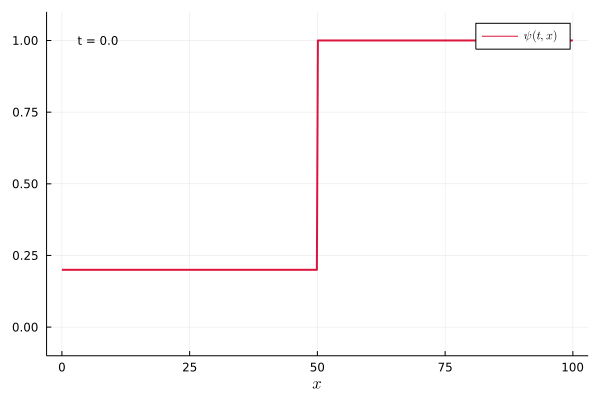

In [3]:
# Velocity of the advection
v = 0.1

# CFL Coefficient
C = 0.7

# Definition of the grids
x_i = 0.
x_f = 100.
Nx = 500
xgrid = LinRange(x_i, x_f, Nx)
dx = xgrid[2] - xgrid[1]

t_i = 0.
t_f = 1000.
dt = C*dx/abs(v)
tgrid = t_i:dt:t_f

psi = fv(TopHat, v, tgrid, xgrid)

anim = @animate for i in 1:50:length(tgrid)
    plot(xgrid, psi[i,:],label=L"\psi(t,x)", lw = 2, linecolor="crimson", ylims=(-0.1,1.1))
    xlabel!(L"x")
    annotate!(7,1, text("t = $(round(tgrid[i];digits=2))",8))
end

gif(anim, "advectionFV3.gif", fps = 15)

---

Al introducir ahora un perfil inicial cuadrado con condiciones de frontera periodicas y utilizando un paso temporal mas grande, se muestra una deformación del perfil inicial (Intente $C_{CFL} = 0.99$ y $C_{CFL} = 0.7$).

┌ Info: Saved animation to 
│   fn = /Users/eduard/Downloads/EjerciciosAC2022/06. PDEs II/advectionFV4.gif
└ @ Plots /Users/eduard/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/eduard/Downloads/EjerciciosAC2022/06. PDEs II/advectionFV4.gif")
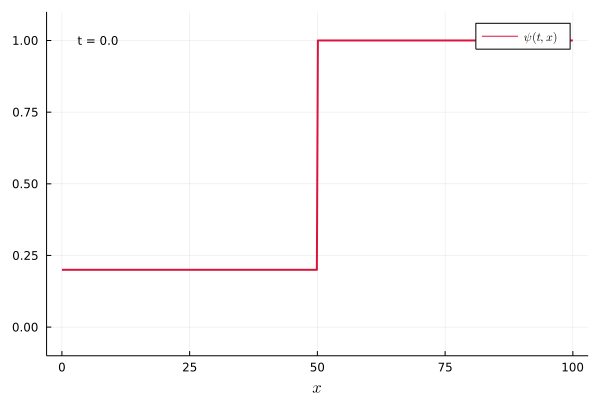

In [7]:
using Plots
using LaTeXStrings

function gaussian(x)
    x0 = 30.
    sigma = sqrt(15.)
    return exp(-(x-x0)^2/(2*sigma^2))
end

function TopHat(x)
    if x<50
        return 0.2
    else
        return 1.0
    end
end

function sinProfile(x; L=x_f)
    return sin(4*pi*x/L)
end


function derivative(f,dx)
    # First derivative dfdx in a domain range
    dfdx = zeros(length(f))
    # Lateral derivate at the boundaries
    dfdx[1] = (f[2] - f[1])/dx
    dfdx[end] = (f[end] - f[end-1])/dx
    # Central derivatives at inner points
    for i in 2:length(f)-1
        dfdx[i] = (f[i+1] - f[i-1])/(2*dx)
    end
    return dfdx
end

    
function flux(psi,v)
    v*psi
end
    

function Riemann(psi, v, dt, dx)
    # Solution of the Riemann problem
    dpsidx = derivative(psi,dx)
    psi_halftime = zeros(length(psi))
    if v>0
        for i in 1:length(psi)
            psi_halftime[i] = psi[i] + (dx/2.)*(1-(dt/dx)*v)*dpsidx[i]
        end
    else
        for i in length(psi)-1:-1:1
            psi_halftime[i] = psi[i] - (dx/2.)*(1-(dt/dx)*v)*dpsidx[i+1]
        end
    end
    return psi_halftime
end
    
    
# Finite-Volume Method
function fv(psi0, v, tgrid, xgrid)
    dt = tgrid[2] - tgrid[1]
    dx = xgrid[2] - xgrid[1]
    psi = zeros(length(tgrid),length(xgrid))
    psi[1,:] = psi0.(xgrid)
    
    for n in 1:length(tgrid)-1, j in 2:length(xgrid)-1
        R = Riemann(psi[n,:], v, dt, dx)
        F = flux.(R,v)
        psi[n+1,j] = psi[n,j] - (dt/dx)*(F[j] - F[j-1])
        # Periodic boudnary conditions
        if v>0
            psi[n+1,1] = psi[n+1,end-1]
            psi[n+1,end] = psi[n+1,end-1]            
        else
            psi[n+1,1] = psi[n+1,2]
            psi[n+1,end] = psi[n+1,1]
        end
    end    
    return psi
end   

                

# Velocity of the advection
v = 0.1

# CFL Coefficient
C = 0.9

# Definition of the grids
x_i = 0.
x_f = 100.
Nx = 500
xgrid = LinRange(x_i, x_f, Nx)
dx = xgrid[2] - xgrid[1]

t_i = 0.
t_f = 4000.
dt = C*dx/abs(v)
tgrid = t_i:dt:t_f




psi = fv(TopHat, v, tgrid, xgrid)

anim = @animate for i in 1:30:length(tgrid)
    plot(xgrid, psi[i,:],label=L"\psi(t,x)", lw = 2, linecolor="crimson", ylims=(-0.1,1.1))
    xlabel!(L"x")
    annotate!(7,1, text("t = $(round(tgrid[i];digits=2))",8))
end

gif(anim, "advectionFV4.gif", fps = 15)


El mal comportamiento en las esquinas del perfil cuadrado se deben al calculo de la primera derivada (i.e. la pendiente) dentro del problema de Riemann. Este inconveniente puede ser corregido mediante la Técnica de Limitado.

## Técnica de Limitado

Con el fin de remover las oscilaciones no deseadas, es posible limitar la pendiente para asegurar que no se introduzcan nuevos máximos o mínimos durante la solución del proceso de advección.

### El limitador  `minmod`

El limitador `minmod` es una técnica en la que la pendiente en las interfaces se define como

\begin{equation}
\left. \frac{\partial \psi}{\partial x} \right|_i = \text{minmod} \left( \frac{\psi_i - \psi_{i-1}}{\Delta x}, \frac{\psi_{i+1} - \psi_{i}}{\Delta x} \right)
\end{equation}

donde 

\begin{equation}
\text{minmod} (\alpha,\beta) = 
\begin{cases}
\alpha & \text{ if } \left| \alpha \right| < \left| \beta \right| \text{ and } \alpha \cdot \beta > 0\\
\beta & \text{ if } \left| \beta \right| < \left| \alpha \right| \text{ and } \alpha \cdot \beta > 0\\
0 & \text{ otherwise}
\end{cases}
\end{equation}


### Ejemplo

Al introducir el limitador `minmod` en la advección del perfil cuadrado se puede apreciar la mejora en la solución. (Intente con $C_{CFL} = 0.99$ y $C_{CFL} = 0.7$).

┌ Info: Saved animation to 
│   fn = /Users/eduard/Documents/Clases/CA/EjerciciosAC2022/16. PDE II. Finite Volmues/advectionFV5.gif
└ @ Plots /Users/eduard/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/eduard/Documents/Clases/CA/EjerciciosAC2022/16. PDE II. Finite Volmues/advectionFV5.gif")
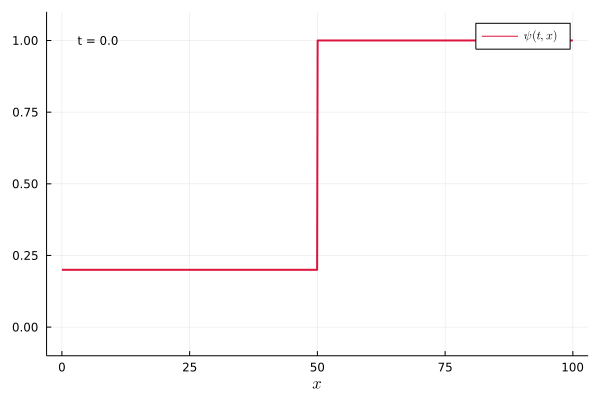

In [6]:
using Plots
using LaTeXStrings

function gaussian(x)
    x0 = 30.
    sigma = sqrt(15.)
    return exp(-(x-x0)^2/(2*sigma^2))
end

function TopHat(x)
    if x<50
        return 0.2
    else
        return 1.0
    end
end

function sinProfile(x; L=x_f)
    return sin(4*pi*x/L)
end


function derivative(f,dx)
    # First derivative dfdx in a domain range
    dfdx = zeros(length(f))
    # Lateral derivate at the boundaries
    dfdx[1] = (f[2] - f[1])/dx
    dfdx[end] = (f[end] - f[end-1])/dx
    # Central derivatives at inner points
    for i in 2:length(f)-1
        dfdx[i] = (f[i+1] - f[i-1])/(2*dx)
    end
    return dfdx
end


#First Derivative
function minmod(f,dx)
    dfdx = zeros(length(f))
    # Boundary points
    dfdx[1] = (f[2] - f[1])/dx
    dfdx[end] = (f[end] - f[end-1])/dx
    for i in 2:length(f)-1
        derback = (f[i]-f[i-1])/dx
        derforw = (f[i+1]-f[i])/dx
        if derback*derforw >0
            if abs(derback) < abs(derforw)
                dfdx[i] = derback
            elseif abs(derforw) < abs(derback)
                dfdx[i] = derforw
            else
                dfdx[i] = 0
            end
        else
            dfdx[i] = 0
        end
    end
    return dfdx
end

    
function flux(psi,v)
    v*psi
end
    

function Riemann(psi, v, dt, dx)
    # Solution of the Riemann problem
    dpsidx = minmod(psi,dx)
    psi_halftime = zeros(length(psi))
    if v>0
        for i in 1:length(psi)
            psi_halftime[i] = psi[i] + (dx/2.)*(1-(dt/dx)*v)*dpsidx[i]
        end
    else
        for i in length(psi)-1:-1:1
            psi_halftime[i] = psi[i] - (dx/2.)*(1-(dt/dx)*v)*dpsidx[i+1]
        end
    end
    return psi_halftime
end
    
    
# Finite-Volume Method
function fv(psi0, v, tgrid, xgrid)
    dt = tgrid[2] - tgrid[1]
    dx = xgrid[2] - xgrid[1]
    psi = zeros(length(tgrid),length(xgrid))
    psi[1,:] = psi0.(xgrid)
    
    for n in 1:length(tgrid)-1, j in 2:length(xgrid)-1
        R = Riemann(psi[n,:], v, dt, dx)
        F = flux.(R,v)
        psi[n+1,j] = psi[n,j] - (dt/dx)*(F[j] - F[j-1])
        # Periodic boudnary conditions
        if v>0
            psi[n+1,1] = psi[n+1,end-1]
            psi[n+1,end] = psi[n+1,end-1]            
        else
            psi[n+1,1] = psi[n+1,2]
            psi[n+1,end] = psi[n+1,1]
        end
    end    
    return psi
end   

                

# Velocity of the advection
v = 0.1

# CFL Coefficient
C = 0.5

# Definition of the grids
x_i = 0.
x_f = 100.
Nx = 1000
xgrid = LinRange(x_i, x_f, Nx)
dx = xgrid[2] - xgrid[1]

t_i = 0.
t_f = 2000.
dt = C*dx/abs(v)
tgrid = t_i:dt:t_f


psi = fv(TopHat, v, tgrid, xgrid)

anim = @animate for i in 1:50:length(tgrid)
    plot(xgrid, psi[i,:],label=L"\psi(t,x)", lw = 2, linecolor="crimson", ylims=(-0.1,1.1))
    xlabel!(L"x")
    annotate!(7,1, text("t = $(round(tgrid[i];digits=2))",8))
end

gif(anim, "advectionFV5.gif", fps = 15)
